# BANK LOAN APPROVAL

In [1]:
# Importing libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [2]:
# Attaching the Dataset

data = pd.read_csv("Loan Approval Datasets.csv") 

In [3]:
# Displaying Dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Shape of the dataset i.e. no of rows, no of columns
data.shape

(614, 13)

In [5]:
# Datatype of the columns
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# concise summary of the dataset, info about index datatype, column datatypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# check for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# replace missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [9]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
# replace missing value with the mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [11]:
# replace missing values with the median value due to outliers
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [12]:
# check whether all the missing values are filled in the Train dataset
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Splitting the Data into Train data and Test Data
#train, test = train_test_split(data, test_size=0.3, random_state=25)
# split the data into train and cross validation set
train,test = train_test_split(data, test_size=0.3, random_state=25)

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,360.0,1.0,Urban,Y
194,LP001664,Male,No,0,Graduate,No,4191,0.0,120.0,360.0,1.0,Rural,Y
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
336,LP002110,Male,Yes,1,Graduate,No,5250,688.0,160.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,LP002036,Male,Yes,0,Graduate,No,2058,2134.0,88.0,360.0,1.0,Urban,Y
143,LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
318,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,1.0,Semiurban,Y


In [17]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
537,LP002738,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
370,LP002194,Female,No,0,Graduate,Yes,15759,0.0,55.0,360.0,1.0,Semiurban,Y
159,LP001552,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y
53,LP001179,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban,N
247,LP001819,Male,Yes,1,Not Graduate,No,6608,0.0,137.0,180.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,LP002277,Female,No,0,Graduate,No,3180,0.0,71.0,360.0,0.0,Urban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y


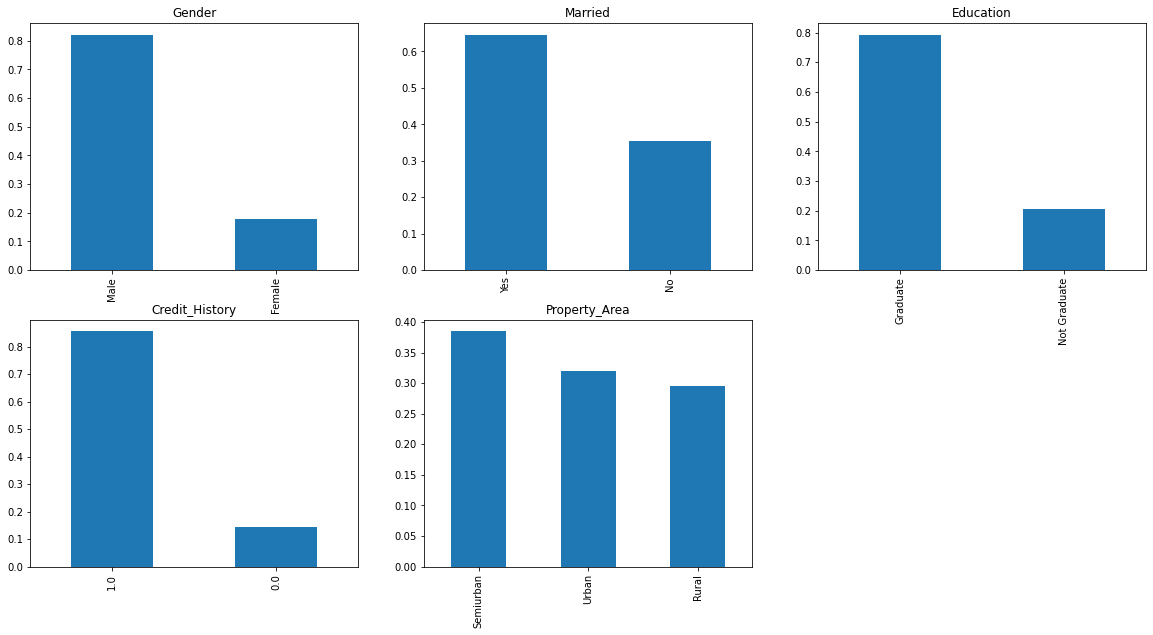

In [18]:
# Visualizing categorical features
# plt.figure
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

# MODEL BUILDING

In [19]:
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [20]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [21]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [22]:
X.shape, train.shape, test.shape

((429, 20), (429, 22), (185, 22))

In [23]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
241,2510,1983.0,140.0,180.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
19,2600,3500.0,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
194,4191,0.0,120.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
532,3588,0.0,110.0,360.0,0.0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0
336,5250,688.0,160.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [24]:
# import library
from sklearn.model_selection import train_test_split

In [25]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((300, 20), (129, 20), (300,), (129,))

In [27]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [28]:
y_cv = y_cv.map({'Y': 1, 'N': 0}).astype(int)
y_train = y_train.map({'Y': 1, 'N': 0}).astype(int)

# Logistic Regression

In [29]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
# make prediction
pred_cv = model.predict(x_cv)

In [31]:
print(classification_report(y_cv, pred_cv ))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        47
           1       0.75      1.00      0.86        82

    accuracy                           0.79       129
   macro avg       0.88      0.71      0.73       129
weighted avg       0.84      0.79      0.76       129



In [32]:
csv = pd.DataFrame(pred_cv)
csv.to_csv("LogisticRegression.csv", index=False)

# Decision Tree 

In [33]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_tree = tree.predict(x_cv)
#print(y_pred_tree)

In [35]:
print(classification_report(y_cv, y_pred_tree ))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        47
           1       0.73      0.76      0.74        82

    accuracy                           0.67       129
   macro avg       0.64      0.63      0.63       129
weighted avg       0.66      0.67      0.66       129



In [36]:
csv = pd.DataFrame(y_pred_tree)
csv.to_csv("Decisiontree.csv", index=False)

# Random Forest Classifier 

In [37]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_forest = forest.predict(x_cv)
#print(y_pred_forest)

In [39]:
print(classification_report(y_cv, y_pred_forest ))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        47
           1       0.74      0.96      0.84        82

    accuracy                           0.76       129
   macro avg       0.80      0.68      0.69       129
weighted avg       0.78      0.76      0.73       129



In [40]:
csv = pd.DataFrame(y_pred_tree)
csv.to_csv("randomForest.csv", index=False)